<a href="https://colab.research.google.com/github/sjubin/-/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

In [11]:
inputs = keras.layers.Input(shape=(1,))
output = keras.layers.Dense(1, activation='linear') (inputs)

linear_regression = keras.models.Model(inputs=inputs, outputs=output)


In [12]:
linear_regression.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
preds = linear_regression.predict(x)
np.asarray(linear_regression.get_weights())

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[-0.705473780632019],
       [0.0]], dtype=object)

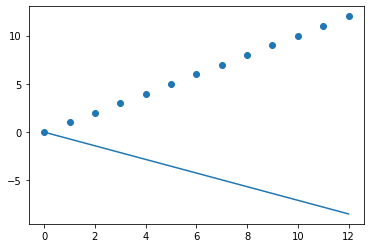

In [15]:
plt.plot(x, preds)
plt.scatter(x,y)

In [16]:
linear_regression.compile(optimizer='sgd', loss='mse')
linear_regression.fit(x=x, y=y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 435ms/step - loss: 145.4320
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0103
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 13/100
1/1 [==============================] - 0s 12

In [17]:
preds = linear_regression.predict(x)

In [18]:
np.asarray(linear_regression.get_weights())

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([[0.985928475856781],
       [0.11661508679389954]], dtype=object)

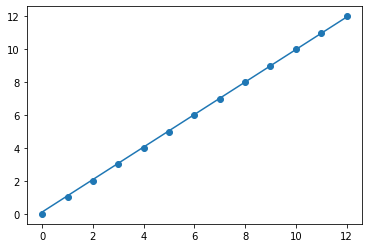

In [19]:
plt.plot(x, preds)
plt.scatter(x,y)

In [20]:
(train_image, train_label),(test_image, test_label) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [21]:
train_image.shape, train_label.shape

((60000, 28, 28), (60000,))

In [23]:
train_label
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
train_image = train_image/255.0
test_image = test_image/255.0

In [27]:
sequential_model = keras.Sequential()

sequential_model.add(keras.layers.Flatten(input_shape=(28,28)))
sequential_model.add(keras.layers.Dense(128,activation='relu'))
sequential_model.add(keras.layers.Dense(10,activation='softmax'))


In [28]:
sequential_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


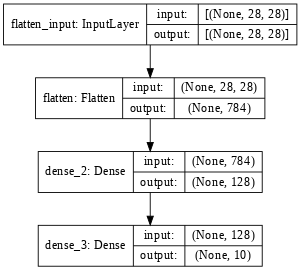

In [32]:
keras.utils.plot_model(sequential_model,show_shapes=True, dpi=64)

In [33]:
sequential_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
sequential_model.fit(train_image,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4308 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1171 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0436 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0317 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.013

In [35]:
test_loss,test_acc=sequential_model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.0916 - accuracy: 0.9768


In [36]:
preds =sequential_model.predict(test_image)
preds[0]

array([7.0380723e-09, 1.3424321e-10, 4.0023274e-08, 4.2975003e-06,
       2.2847082e-14, 1.6844930e-11, 4.6113504e-13, 9.9999535e-01,
       1.7982464e-08, 3.4579742e-07], dtype=float32)

In [37]:
onehot_train_label = keras.utils.to_categorical(train_label)
onehot_train_label= keras.utils.to_categorical(test_label)

In [38]:
train_label[1],onehot_train_label[1]

(0, array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [39]:
sequential_model = keras.Sequential()

sequential_model.add(keras.layers.Flatten(input_shape=(28,28)))(inputs)
sequential_model.add(keras.layers.Dense(128,activation='relu'))(flatten)
sequential_model.add(keras.layers.Dense(10,activation='softmax'))(dense)

functional_model = keras.models.Model(inputs=inputs, outputs=output)


TypeError: ignored